# Real Estate - Housing

The real estate market is something that every person living in the country has to deal with, and as a result it makes a great topic about data analytics. The housing price or rental price in San Francisco Bay Area accelerating at shocking rates. From 2010 to 2017, the median price of a single family home in San Francisco has gone from approximately &775,000 to $1.5 million. 

Please gather data or text information about the real estate market in San Francisco Bay Area. The location covers but not limited to: San Francisco, Cities in Peninsula (South San Francisco, San Mateo, Burlingame, and so on), San Jose, Cities in South Bay (Palo Alto, Santa Clara, Cupertino, and so on), Cities in East Bay (Milpitas, Fremont, Union City, Hayward, Castro Valley, Berkeley, Oakland), Cities in Tri-Valley (Pleasanton, Dublin, San Ramon, Danville, and so on). The data may include but not limited to: property data (type, size, bedroom/bathroom), price data (current listing price, and or historical selling price), address, city/state/zipcode, safety/security (crime rate in neighborhood), agent information (name, company website, and so on), Reviews (review of the property, review of the agent) … There are so many data available, you may customize yourself based on the research questions you would like to analyze and the availability of the data source. Try whichever way works most efficient to help you to get all the data.

Collect information on 600 distinct properties or more from your search. The raw data types may include string, float, integer and so on. Variety of type of data is also a consideration when I grade the complexity of your project. 


Our aim is to understand, explore the performance of specific neighborhoods and answer few research questions. 

### Data
 The data was scraped from available results in zillow.com. The features scrapped are:
 * Address
 * List_price
 * Address.1
 * City
 * Zipcode 
 * Zestimate 
 * Bed
 * Bath
 * House_size
 * House_type
 * Year_Built	
 * Parking	
 * Lot	
 * HOA	
 * Price_Sqft	
 * walk_score	
 * walk_desc	
 * transit_score	
 * transit_desc

### Importing Libraries

### WEB SCRAPPING

In [1]:
# importing all the required libraries
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup as BS
import ssl
import json
import ast
import os
from urllib.request import Request, urlopen
import pandas as pd
import requests
import re
import time
import math

In [2]:
# securing the connection 
ctx                = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode    = ssl.CERT_NONE

In [3]:
# iniatializing urls,zillow links
urls = []
zillow_links = []

def get_house_list():
    url_count='https://www.zillow.com/homes/Bay-Area,-CA_rb/'
    request_url_count = Request(url_count, headers={'User-Agent': 'Mozilla/5.0'})
    zillow_count = urlopen(request_url_count).read()
    soup = BS(zillow_count,'html.parser')
    result_count=soup.findAll('span',attrs={'class':'result-count'})
    for i in range(1,30):
        #print (i)
        url_1= "https://www.zillow.com/homes/Bay-Area,-CA_rb/"+str(i)+"_p/"
        #print (url_1)
        request_url     = Request(url_1, headers={'User-Agent': 'Mozilla/5.0'})
        zillow = urlopen(request_url).read()
        soup = BS(zillow,'html.parser')
        links = soup.findAll('a',attrs={'class':'list-card-link list-card-link-top-margin'},href=True)
        for houselink in links:
            #print(houselink['href'])
            houselink_cur=houselink['href']
            if "homedetails" in str(houselink_cur):
                print(houselink_cur)
                zillow_links.append(houselink['href'])

In [4]:
#Generates the list of urls for the houses in bay area:
get_house_list()
zillow_links

https://www.zillow.com/homedetails/37362-Parish-Cir-181-Fremont-CA-94536/2125211261_zpid/
https://www.zillow.com/homedetails/1976-Locomotive-Ln-UNIT-111-Livermore-CA-94550/68031111_zpid/
https://www.zillow.com/homedetails/8-Hampshire-Ave-Daly-City-CA-94015/15608614_zpid/
https://www.zillow.com/homedetails/492-Adeline-Ave-San-Jose-CA-95136/64512617_zpid/
https://www.zillow.com/homedetails/1789-Tulare-Ave-Richmond-CA-94805/18539659_zpid/
https://www.zillow.com/homedetails/1561-S-Whitehall-Ln-Saint-Helena-CA-94574/19404515_zpid/
https://www.zillow.com/homedetails/166-Sherman-Ln-Morgan-Hill-CA-95037/166731921_zpid/
https://www.zillow.com/homedetails/2291-Winged-Foot-Rd-Half-Moon-Bay-CA-94019/15588993_zpid/
https://www.zillow.com/homedetails/552-Manzana-Pl-San-Jose-CA-95112/2144400418_zpid/
https://www.zillow.com/homedetails/1318-Portland-Ave-Albany-CA-94706/24855485_zpid/
https://www.zillow.com/homedetails/235-Appalachian-Dr-Martinez-CA-94553/18401997_zpid/
https://www.zillow.com/homedetai

https://www.zillow.com/homedetails/1881-Jubilee-Dr-Brentwood-CA-94513/18286894_zpid/
https://www.zillow.com/homedetails/4159-Dulcey-Dr-San-Jose-CA-95136/19705228_zpid/
https://www.zillow.com/homedetails/18906-Sara-Park-Cir-Saratoga-CA-95070/19653904_zpid/
https://www.zillow.com/homedetails/989-Kittery-Way-Pinole-CA-94564/18497863_zpid/
https://www.zillow.com/homedetails/1230-Hillview-Dr-Livermore-CA-94551/24936538_zpid/
https://www.zillow.com/homedetails/392-Oak-Ln-Pleasanton-CA-94566/25082270_zpid/
https://www.zillow.com/homedetails/45249-Electric-Ter-101-Fremont-CA-94539/331751662_zpid/
https://www.zillow.com/homedetails/101-Adobe-Way-Sonoma-CA-95476/184885147_zpid/
https://www.zillow.com/homedetails/127-Pleasant-Ave-Santa-Rosa-CA-95403/15860309_zpid/
https://www.zillow.com/homedetails/1167-Sierra-Vista-Way-Lafayette-CA-94549/18462804_zpid/
https://www.zillow.com/homedetails/18-Rossi-Ave-Antioch-CA-94509/18307492_zpid/
https://www.zillow.com/homedetails/5053-Noella-Way-San-Jose-CA-95

https://www.zillow.com/homedetails/37362-Parish-Cir-181-Fremont-CA-94536/2125211261_zpid/
https://www.zillow.com/homedetails/1976-Locomotive-Ln-UNIT-111-Livermore-CA-94550/68031111_zpid/
https://www.zillow.com/homedetails/8-Hampshire-Ave-Daly-City-CA-94015/15608614_zpid/
https://www.zillow.com/homedetails/492-Adeline-Ave-San-Jose-CA-95136/64512617_zpid/
https://www.zillow.com/homedetails/1789-Tulare-Ave-Richmond-CA-94805/18539659_zpid/
https://www.zillow.com/homedetails/1561-S-Whitehall-Ln-Saint-Helena-CA-94574/19404515_zpid/
https://www.zillow.com/homedetails/166-Sherman-Ln-Morgan-Hill-CA-95037/166731921_zpid/
https://www.zillow.com/homedetails/2291-Winged-Foot-Rd-Half-Moon-Bay-CA-94019/15588993_zpid/
https://www.zillow.com/homedetails/552-Manzana-Pl-San-Jose-CA-95112/2144400418_zpid/
https://www.zillow.com/homedetails/37362-Parish-Cir-181-Fremont-CA-94536/2125211261_zpid/
https://www.zillow.com/homedetails/1976-Locomotive-Ln-UNIT-111-Livermore-CA-94550/68031111_zpid/
https://www.zill

['https://www.zillow.com/homedetails/37362-Parish-Cir-181-Fremont-CA-94536/2125211261_zpid/',
 'https://www.zillow.com/homedetails/1976-Locomotive-Ln-UNIT-111-Livermore-CA-94550/68031111_zpid/',
 'https://www.zillow.com/homedetails/8-Hampshire-Ave-Daly-City-CA-94015/15608614_zpid/',
 'https://www.zillow.com/homedetails/492-Adeline-Ave-San-Jose-CA-95136/64512617_zpid/',
 'https://www.zillow.com/homedetails/1789-Tulare-Ave-Richmond-CA-94805/18539659_zpid/',
 'https://www.zillow.com/homedetails/1561-S-Whitehall-Ln-Saint-Helena-CA-94574/19404515_zpid/',
 'https://www.zillow.com/homedetails/166-Sherman-Ln-Morgan-Hill-CA-95037/166731921_zpid/',
 'https://www.zillow.com/homedetails/2291-Winged-Foot-Rd-Half-Moon-Bay-CA-94019/15588993_zpid/',
 'https://www.zillow.com/homedetails/552-Manzana-Pl-San-Jose-CA-95112/2144400418_zpid/',
 'https://www.zillow.com/homedetails/1318-Portland-Ave-Albany-CA-94706/24855485_zpid/',
 'https://www.zillow.com/homedetails/235-Appalachian-Dr-Martinez-CA-94553/18401

In [75]:
# defined a function for extracting information
def housedetails(url):
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode    = ssl.CERT_NONE
    request     = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    zillow = urlopen(request).read()
    soup = BS(zillow,'html.parser')

    #         a_zestimate =soup.findAll('div',attrs={'display':'flex'}) 
    #flags are for corner cases
    flag=1
    rent_sale=soup.findAll('div',attrs = {'class':"ds-home-details-chip"})
    for i in rent_sale:
        if "rent" in i.text:
            flag=0
        elif "construction" in i.text:
            flag=0
    if(flag):
        zestimate =soup.findAll('div',attrs={'display':'flex'})
        zestimate = zestimate[4].text.replace(",","")

        house2=soup.findAll('li',attrs={'class':'ds-home-fact-list-item'})
        house_facts=[None]*6
        for i in house2:
            #print(i.text)
            #print(i.find_all(text="Type"))
            if "Type" in i.text:
                house_facts[0]=i.text.replace("Type:","")
                #print(house_facts[0])
            elif "Year" in i.text:
                house_facts[1]=i.text.replace("Year built:","")
            elif "Parking" in i.text:
                house_facts[2]=i.text.replace("Parking:","")
            elif "Lot" in i.text:
                lotsize=i.text.replace("Lot:","").replace(",","")
                house_facts[3]=lotsize
            elif "HOA" in i.text:
                house_facts[4]=i.text.replace("HOA:","")
            elif "Price" in i.text:
                house_facts[5]=i.text.replace("Price/sqft:","").replace(",","")

        # finding listprice paramter
        listprice = soup.findAll('span',attrs={'class':'ds-value'})
        listprice = listprice[0].text.replace(",","")
        
        #finding address
        address = soup.findAll('h1',attrs={'class':'ds-address-container'})
        address = address[0].text.replace(",",";").replace("\xa0","")
        
        # finding bed and bath
        bed_bath = soup.findAll('span',attrs = {'class':'ds-bed-bath-living-area'})
        bedinfo=[None]*3
        for i in bed_bath:
            if "bd" in i.text:
                bedinfo[0]=i.text.replace("bd","")
            elif "ba" in i.text:
                bedinfo[1]=i.text.replace("ba","")
            elif "Square Feet" in i.text:
                sqftt=i.text.replace("Square Feet","")
                bedinfo[2]=str(sqftt).replace(",","")
        house1_details=[]
        house1_details=[url,listprice,address,zestimate]
        house1_details.extend(bedinfo)
        house1_details.extend(house_facts)
        return house1_details

In [76]:
# creating excel file  and writing the extracted information into it
zillow_houses = []
timestr = time.strftime("%Y%m%d-%H%M%S")
filename=("Scrapped_data.csv")
f1=open(filename,'w')
#Headers for the file:
f1.write("zpidurl;List_price;Address;City;Zipcode;Zestimate;Bed;Bath;House_size;House_type;Year_Built;Parking;Lot;HOA;Price/Sqft\n")
for link in zillow_links:
#     print(link)
    res = housedetails(link)
    zillow_houses.append(res)
#     print(res)
    data_to_file=str(res).replace("'","").replace("]","").replace("[","").replace(",",";")
    f1.write(data_to_file+"\n")
f1.close()    
    

In [77]:
import pandas as pd

df = pd.read_excel('Scrapped_data.xlsx')

df['zpid_url'] = df.Address.str.split('/').str[5]
df['zpid'] = df.zpid_url.str.split('_').str[0]
df = df.drop(['zpid_url'],axis=1)

In [78]:
list_of_zpids = df['zpid'].to_list()
print(list_of_zpids)
#print(list_of_zpids)
with open('zpids.txt', "w") as myfile:
        for i in list_of_zpids:
                myfile.write("%s\n" % i)

['19481361', '19483503', '19471816', '19483974', '79841734', '124742590', '19477858', '124030438', '19478250', '82960475', '250816029', '19479726', '251006717', '82952140', '19475230', '19476584', '19482023', '124745609', '19482898', '19476932', '19479045', '79846376', '19477447', '116157347', '300480687', '19472765', '64811281', '19471732', '19474269', '300482258', '19482611', '19471616', '2077983573', '251006533', '2078053629', '2078053911', '19481014', '295619764', '19481454', '19477498', '19480564', '19477075', '153117984', '304782353', '304782352', '304782354', '2078331304', '19481116', '2078352613', '82962599', '2078530780', '19476281', '153118047', '243211060', '19481075', '19473356', '300482048', '250642011', '64703491', '243209635', '153128201', '19479151', '2084842783', '153127198', '79845487', '19480754', '19473140', '19474754', '19481188', '300472231', '2096244908', '2086193868', '19536570', '19531204', '19510951', '19514729', '19510720', '19509919', '19536739', '19533421',

In [79]:
import http.client
import mimetypes
import json

conn = http.client.HTTPSConnection("www.zillow.com")

def get_walk_and_transit(property_id):
	payload = "{\"query\":\"query WalkAndTransitScoreQuery($zpid: ID!) {\\n  property(zpid: $zpid) {\\n    id\\n    walkScore {\\n      walkscore\\n      description\\n      ws_link\\n    }\\n    transitScore {\\n      transit_score\\n      description\\n      ws_link\\n    }\\n  }\\n}\\n\",\"operationName\":\"WalkAndTransitScoreQuery\",\"variables\":{\"zpid\":" + str(property_id) + "},\"clientVersion\":\"home-details/6.0.11.0.0.hotfix-10-01-2020.48935c6\"}"
	headers = {
	  'content-type': 'text/plain'
	}
	conn.request("POST", "/graphql/?zpid=" + str(property_id) + "&operationName=WalkAndTransitScoreQuery", payload, headers)
	res = conn.getresponse()
	data = res.read()
	res_json = json.loads(data.decode("utf-8"))
	walk_score_obj = res_json['data']['property']['walkScore']
	transit_score_obj = res_json['data']['property']['transitScore']
	return walk_score_obj, transit_score_obj

def get_price_history(property_id):
	payload = "{\"query\":\"query HomeValueChartDataQuery($zpid: ID!, $metricType: HomeValueChartMetricType, $timePeriod: HomeValueChartTimePeriod) {\\n  property(zpid: $zpid) {\\n    homeValueChartData(metricType: $metricType, timePeriod: $timePeriod) {\\n      points {\\n        x\\n        y\\n      }\\n      name\\n    }\\n  }\\n}\\n\",\"operationName\":\"HomeValueChartDataQuery\",\"variables\":{\"zpid\": " + str(property_id) + ",\"timePeriod\":\"TEN_YEARS\",\"metricType\":\"LOCAL_HOME_VALUES\",\"forecast\":true},\"clientVersion\":\"home-details/6.0.11.0.0.hotfix-10-01-2020.48935c6\"}"
	headers = {
	  'content-type': 'text/plain'
	}
	conn.request("POST", "/graphql/?zpid=" + str(property_id) +"&timePeriod=TEN_YEARS&metricType=LOCAL_HOME_VALUES&forecast=true&operationName=HomeValueChartDataQuery", payload, headers)
	res = conn.getresponse()
	data = res.read()
	res_json = json.loads(data.decode("utf-8"))
	return res_json['data']['property']['homeValueChartData']

property_id_list = [19481361,19483503,19471816,19483974]

for zpid in property_id_list:
	walk, trans = get_walk_and_transit(zpid)
	price_history = get_price_history(zpid)

	print("zpid: {} walk score: {} description: {} transit score: {} description: {} zestimate chart history size: {}".format(zpid, walk['walkscore'], walk['description'], trans['transit_score'], trans['description'], len(price_history)))

zpid: 19481361 walk score: 26 description: Car-Dependent transit score: 24 description: Minimal Transit zestimate chart history size: 2
zpid: 19483503 walk score: 12 description: Car-Dependent transit score: 22 description: Minimal Transit zestimate chart history size: 2
zpid: 19471816 walk score: 84 description: Very Walkable transit score: 39 description: Some Transit zestimate chart history size: 1
zpid: 19483974 walk score: 58 description: Somewhat Walkable transit score: 34 description: Some Transit zestimate chart history size: 2


### Importing Libraries


In [80]:
import pandas as pd
import numpy as np

### Import data


In [5]:
zillow_dataframe = pd.read_excel('Scrapped_data.xlsx')
zillow_dataframe.head()

,Unnamed: 0,Address,List_price,Address.1,City,Zipcode,Zestimate,Bed,Bath,House_size,House_type,Year_Built,Parking,Lot,HOA,Price_Sqft,walk_score,walk_desc,transit_score,transit_desc
0,0,https://www.zillow.com/homedetails/465-La-Bare...,1299999,465 La Baree Dr,Milpitas,95035,1345104,5,3.0,1902,Single Family,1962,1 space,6198.0,0,683,26,Car-Dependent,21,Minimal Transit
1,1,https://www.zillow.com/homedetails/2150-Lacey-...,1248888,2150 Lacey Dr,Milpitas,95035,1328097,4,3.0,1856,Single Family,1971,2 spaces,6682.0,0,673,12,Car-Dependent,19,Minimal Transit
2,2,https://www.zillow.com/homedetails/19-Heath-St...,1300000,19 Heath St,Milpitas,95035,1367241,3,3.0,1244,Single Family,1961,2 spaces,6490.0,0,1045,84,Very Walkable,35,Some Transit
3,3,https://www.zillow.com/homedetails/2192-Calle-...,1198000,2192 Calle Mesa Alta,Milpitas,95035,1227534,3,3.0,1528,Single Family,1992,2 spaces,2008.0,0,784,58,Somewhat Walkable,32,Some Transit
4,4,https://www.zillow.com/homedetails/416-Dempsey...,458000,416 Dempsey Rd UNIT 217,Milpitas,95035,463216,2,1.0,842,Condo,2007,0,0.0,420,544,65,Somewhat Walkable,26,Some Transit


In [82]:
zillow_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     500 non-null    int64  
 1   Unnamed: 0.1   500 non-null    int64  
 2   Address        500 non-null    object 
 3   List_price     500 non-null    int64  
 4   Address.1      500 non-null    object 
 5   City           500 non-null    object 
 6   Zipcode        500 non-null    int64  
 7   Zestimate      500 non-null    int64  
 8   Bed            500 non-null    int64  
 9   Bath           500 non-null    float64
 10  House_size     500 non-null    int64  
 11  House_type     500 non-null    object 
 12  Year_Built     500 non-null    int64  
 13  Parking        500 non-null    object 
 14  Lot            500 non-null    float64
 15  HOA            500 non-null    int64  
 16  Price_Sqft     500 non-null    int64  
 17  walk_score     500 non-null    int64  
 18  walk_desc 

In [83]:
print('Number of listings: ', zillow_dataframe.shape[0])
print('Number of features in dataset: ', zillow_dataframe.shape[1])

Number of listings:  500
Number of features in dataset:  21


### Data cleaning & wrangling : housing dataframe 


In [84]:
# Removing "CA" characters from zipcode.
spec_chars = ["CA"]
for char in spec_chars:
    zillow_dataframe['Zipcode'] = zillow_dataframe['Zipcode'].apply(str).str.replace(char,'')

In [85]:
#Removing sqft from lot column.
spec_chars = ["sqft","acres", "Acres", "acre"]
for char in spec_chars:
    zillow_dataframe['Lot'] = zillow_dataframe['Lot'].apply(str).str.replace(char,'')

In [86]:
# Removing $ /month or /mo from HOA and leeping only price.
spec_chars = ["$","/","month","mo","/month","/mo"]
for char in spec_chars:
    zillow_dataframe['HOA'] = zillow_dataframe['HOA'].apply(str).str.replace(char, '')

<ipython-input-86-7893185e6b03>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  zillow_dataframe['HOA'] = zillow_dataframe['HOA'].apply(str).str.replace(char, '')


In [87]:
# Removing None value, special character with O value.
zillow_dataframe = zillow_dataframe.replace("None",0)
zillow_dataframe = zillow_dataframe.fillna(0)
zillow_dataframe=zillow_dataframe.replace("--",0)
zillow_dataframe['Parking'] = zillow_dataframe['Parking'].replace("No Data","0")


In [88]:
np.count_nonzero(zillow_dataframe["Zestimate"])

500

#### Missing zestimate values account for about 7.4%. Fill the missing Zestimate values with List price of the listing.


In [89]:
zillow_dataframe["Zestimate"] = zillow_dataframe["Zestimate"].mask(zillow_dataframe["Zestimate"] ==0).fillna(zillow_dataframe["List_price"])

In [90]:
np.count_nonzero(zillow_dataframe["Zestimate"])

500

#### Imputing missing Year_Built values with 0000 value.


In [91]:
zillow_dataframe["Year_Built"] = zillow_dataframe["Year_Built"].replace(0,"0000")
zillow_dataframe["Year_Built"] = zillow_dataframe["Year_Built"].replace("No Data","0000")


In [92]:
# Converting data type of Lot,HOA,Price/Sqft from object to integer/float for analysis.
zillow_dataframe['Lot'] = pd.to_numeric(zillow_dataframe['Lot'])

zillow_dataframe['HOA'] = zillow_dataframe['HOA'].astype(str).astype(float)
zillow_dataframe['Price_Sqft'] = zillow_dataframe['Price_Sqft'].astype(str).astype(float)

In [93]:
zillow_dataframe.describe()

,Unnamed: 0,Unnamed: 0.1,List_price,Zestimate,Bed,Bath,House_size,Lot,HOA,Price_Sqft,walk_score,transit_score
count,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,249.500000,1.974580e+06,1.959934e+06,3.016000,2.403000,1917.228000,2326.93518,190.528000,819.894000,60.146000,39.852000
std,144.481833,144.481833,2.196122e+06,2.080501e+06,1.636184,1.438046,1419.740898,2954.57119,416.249209,670.398149,27.689096,17.544621
min,0.000000,0.000000,1.600000e+05,1.600000e+05,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,124.750000,124.750000,9.037375e+05,9.255622e+05,2.000000,2.000000,1103.000000,0.00000,0.000000,474.000000,47.000000,33.000000
50%,249.500000,249.500000,1.318666e+06,1.369262e+06,3.000000,2.000000,1538.000000,1.04000,0.000000,766.000000,67.000000,41.000000
75%,374.250000,374.250000,1.998916e+06,2.087508e+06,4.000000,3.000000,2220.500000,4633.25000,325.000000,1116.000000,81.000000,52.000000
max,499.000000,499.000000,1.850000e+07,1.831571e+07,11.000000,10.000000,14391.000000,10872.00000,5008.000000,7565.000000,99.000000,74.000000


In [94]:
zillow_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     500 non-null    int64  
 1   Unnamed: 0.1   500 non-null    int64  
 2   Address        500 non-null    object 
 3   List_price     500 non-null    int64  
 4   Address.1      500 non-null    object 
 5   City           500 non-null    object 
 6   Zipcode        500 non-null    object 
 7   Zestimate      500 non-null    int64  
 8   Bed            500 non-null    int64  
 9   Bath           500 non-null    float64
 10  House_size     500 non-null    int64  
 11  House_type     500 non-null    object 
 12  Year_Built     500 non-null    object 
 13  Parking        500 non-null    object 
 14  Lot            500 non-null    float64
 15  HOA            500 non-null    float64
 16  Price_Sqft     500 non-null    float64
 17  walk_score     500 non-null    int64  
 18  walk_desc 

### Heat map to visualize any missing values

<AxesSubplot:>

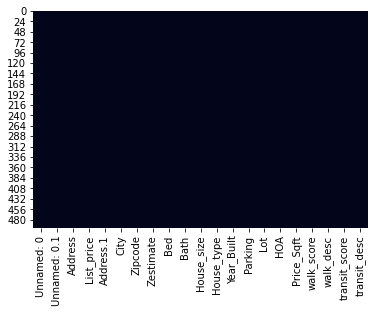

In [95]:
import seaborn as sns
sns.heatmap(zillow_dataframe.isnull(), cbar=False)
#No missing values and heat map is blank.

In [96]:
zillow_dataframe.to_excel('Scrapped_data.xlsx', sheet_name='Zillow')
